---

<h3 style="text-align: center;">Analyzing User Interaction and Conversion in A/A/B Test for Font Implementation in an Online Application</h3>

### 1. Introduction

This project aims to analyze user interactions and their journey through the application's sales funnel. We begin by studying the funnel to understand how users progress towards making a purchase, identifying stages where users may drop off.

Additionally, we delve into the results of an A/A/B test to give useful information for the implementation changes to the application's fonts. 

The experiment divides users into three groups: two control groups using the old fonts and one test group using the new fonts.

We analyze user engagement metrics, identify popular events, and calculate user progression through the sales funnel.

Furthermore, we conduct hypothesis tests to compare user behavior between control groups (246 and 247) and evaluate if the groups were correctly divided. We extend this analysis to include the experimental group (248) and compare its performance against the control groups.

ES:

Este proyecto tiene como objetivo analizar las interacciones de los usuarios y su recorrido a través del proceso de venta de la aplicación. Se inicia estudiando el embudo para entender cómo los usuarios avanzan hacia la realización de una compra, identificando las etapas donde los usuarios pueden abandonar el proceso.

Además, profundizamos en los resultados de una prueba A/A/B para obtener información útil sobre la implementación de cambios en las fuentes de la aplicación.

El experimento divide a los usuarios en tres grupos: dos grupos de control que utilizan las fuentes antiguas y un grupo de prueba que utiliza las fuentes nuevas. Por lo que la pretensión es determinar qué conjunto de fuentes produce mejores resultados.

Se analizaron las métricas de participación de los usuarios, se identificaron los eventos populares y se calculó la progresión de los usuarios a través del embudo de ventas.

Además, se realizaron pruebas de hipótesis para comparar el comportamiento de los usuarios entre los grupos de control (246 y 247) y se evaluaron si los grupos se dividieron correctamente. Finalmente se extendió el análisis para incluir al grupo experimental (248) y comparamos su rendimiento con los grupos de control.

### 2. Loading datasets and importing libraries

In [63]:
# Import the libraries / #Se importan las librerías
import pandas as pd
import scipy.stats as stats
from scipy.stats import ttest_ind
from scipy.stats import levene
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sb
import math as mth
from scipy.stats import mannwhitneyu

In [33]:
# Load and print the database
df = pd.read_csv("/datasets/logs_exp_us.csv", sep="\t")
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
1,MainScreenAppear,7416695313311560658,1564053102,246
2,PaymentScreenSuccessful,3518123091307005509,1564054127,248
3,CartScreenAppear,3518123091307005509,1564054127,248
4,PaymentScreenSuccessful,6217807653094995999,1564055322,248
...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,1565212345,247
244122,MainScreenAppear,5849806612437486590,1565212439,246
244123,MainScreenAppear,5746969938801999050,1565212483,246
244124,MainScreenAppear,5746969938801999050,1565212498,246


### 3. Data Exploration

In [34]:
#display information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB


In [35]:
#Checking if there are duplicated information

duplicated_rows = df[df.duplicated(subset=['EventName', 'DeviceIDHash'], keep=False)]
duplicated_rows_filter = duplicated_rows[duplicated_rows['DeviceIDHash'] == 4575588528974610257]
duplicated_rows_filter
#print(f'The df dataframe has {duplicate_count} duplicate values')

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,MainScreenAppear,4575588528974610257,1564029816,246
4583,MainScreenAppear,4575588528974610257,1564633800,246
108616,MainScreenAppear,4575588528974610257,1564888031,246
108618,OffersScreenAppear,4575588528974610257,1564888070,246
108621,MainScreenAppear,4575588528974610257,1564888143,246
108623,MainScreenAppear,4575588528974610257,1564888203,246
108627,MainScreenAppear,4575588528974610257,1564888262,246
108628,MainScreenAppear,4575588528974610257,1564888306,246
111291,MainScreenAppear,4575588528974610257,1564899761,246
111948,MainScreenAppear,4575588528974610257,1564901643,246


In [36]:
#Checking if there are missing values
print(df.isnull().sum())

EventName         0
DeviceIDHash      0
EventTimestamp    0
ExpId             0
dtype: int64


**Coments:**

* The name of the column 'DeviceIDHash' will be replaced with 'UserId', 'EventTimestamp' with 'DateTime', and 'Expld' with 'GroupNumber'. / El nombre de la columna 'DeviceIDHash' se cambiará a 'UserId', 'EventTimestamp' a 'DateTime', y 'Expld' a 'GroupNumber'.

* The data type of 'EventTimestamp' will be changed from int64 to datetime, as it will be necessary for working with the data. / El tipo de dato de 'EventTimestamp' se cambiará de int64 a datetime, ya que será necesario para trabajar con los datos.

* Regarding duplicates: It's normal to have duplicates because a user might perform the same activity on different dates or even on the same date, resulting in multiple duplicates across all columns. / Con respecto a los duplicados: Es normal tener duplicados porque un usuario puede realizar la misma actividad en diferentes fechas o incluso en la misma fecha, lo que resulta en múltiples duplicados en todas las columnas.

* There are no missing values in the dataset. / No hay valores faltantes en el conjunto de datos.

ES: 

* El nombre de la columna 'DeviceIDHash' se cambiará a 'UserId', 'EventTimestamp' a 'DateTime', y 'Expld' a 'GroupNumber'.

* El tipo de dato de 'EventTimestamp' se cambiará de int64 a datetime, ya que será necesario para trabajar con los datos.

* Con respecto a los duplicados: Es normal tener duplicados porque un usuario puede realizar la misma actividad en diferentes fechas o incluso en la misma fecha, lo que resulta en múltiples duplicados en todas las columnas.

* No hay valores faltantes en el conjunto de datos.

In [37]:
#Renaming columns
df = df.rename(columns={
    'DeviceIDHash': 'UserId', 
    'EventTimestamp': 'DateTime', 
    'Expld': 'GroupNumber'
})

In [38]:
#Converting the data of DateTime column to DateTime
df['DateTime'] = pd.to_datetime(df['DateTime'], unit='s')

In [39]:
#Converting the data of DateTime column to DateTime

df['Date'] = pd.to_datetime(df['DateTime'].dt.strftime('%Y-%m-%d'))
df

,EventName,UserId,DateTime,ExpId,Date
0,MainScreenAppear,4575588528974610257,2019-07-25 04:43:36,246,2019-07-25
1,MainScreenAppear,7416695313311560658,2019-07-25 11:11:42,246,2019-07-25
2,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
3,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
4,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
...,...,...,...,...,...
244121,MainScreenAppear,4599628364049201812,2019-08-07 21:12:25,247,2019-08-07
244122,MainScreenAppear,5849806612437486590,2019-08-07 21:13:59,246,2019-08-07
244123,MainScreenAppear,5746969938801999050,2019-08-07 21:14:43,246,2019-08-07
244124,MainScreenAppear,5746969938801999050,2019-08-07 21:14:58,246,2019-08-07


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   EventName  244126 non-null  object        
 1   UserId     244126 non-null  int64         
 2   DateTime   244126 non-null  datetime64[ns]
 3   ExpId      244126 non-null  int64         
 4   Date       244126 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 9.3+ MB


In [41]:
#counting events
events_name = df['EventName'].unique()
 
print(f"There are {df['EventName'].nunique()} events in the register: {events_name}")

There are 5 events in the register: ['MainScreenAppear' 'PaymentScreenSuccessful' 'CartScreenAppear'
 'OffersScreenAppear' 'Tutorial']


In [42]:
#counting number of users 

users_by_event = df.groupby('EventName')['UserId'].nunique()

print(f"there are {df['UserId'].nunique()} users in total, divided by event as follows:")
print()
print(users_by_event)

there are 7551 users in total, divided by event as follows:

EventName
CartScreenAppear           3749
MainScreenAppear           7439
OffersScreenAppear         4613
PaymentScreenSuccessful    3547
Tutorial                    847
Name: UserId, dtype: int64


Comment: 

The number of users per event is higher than the total number of users because one user can be associated with multiple events

ES:

El numero de usuarios por evento es total que el total de numero de usuarios porque un usuario puede estar asociado con múltiples eventos

In [43]:
#Calculating the average of events per user

event_per_users_avg = df.groupby('UserId')['EventName'].count().mean()
event_per_users_avg

32.33028737915508

In [44]:
#Min and Maximum value fot dates
df_min_date = df['DateTime'].min()
df_max_date = df['DateTime'].max()

print(f'the minimum date registered is {df_min_date} and the maximum is {df_max_date}')

the minimum date registered is 2019-07-25 04:43:36 and the maximum is 2019-08-07 21:15:17


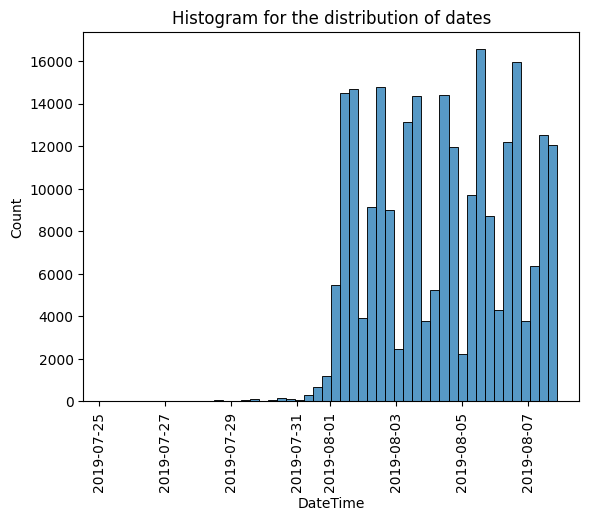

In [45]:
#Graphing a histogram for the distribution of dates
sb.histplot(df['DateTime'], bins=50)
plt.xticks(rotation=90)
plt.title('Histogram for the distribution of dates')
plt.show()


**Comments:** 

There isn't much information between 2019-07-25 and 2019-07-31, so it was decided to delete this range of time to prevent it from affecting the results.

ES: 

No hay mucha información entre el 25/07/2019 y el 31/07/2019, por lo que se decidió eliminar este rango de tiempo para evitar que afecte los resultados.

In [46]:
#Creating a dataframe with only the information for june
df_august = df[df['DateTime'].dt.month != 7]

In [47]:
#Calculating the number of users before and after excluding the data from july
print(f"The total of users in the original DataFrame was {df['UserId'].nunique()}.\nThe total of users after excluding the month of july is {df_august['UserId'].nunique()}.")

The total of users in the original DataFrame was 7551.
The total of users after excluding the month of july is 7534.


In [48]:
#Calculating the events before and after excluding the data from july
print(f"The total of events in the original DataFrame was {df['EventName'].count()}.\nThe total of events after excluding the month of july is {df_august['EventName'].count()}.")

The total of events in the original DataFrame was 244126.
The total of events after excluding the month of july is 241298.


**Comments:**

The number of events and users didn't change that much. In the case of events, 2,828 were lost, which represents 1% of the data, and in the case of users, it was 17, which is equivalent to 0.2% of the total.

ES: 

El número de eventos y usuarios no cambió mucho. En el caso de los eventos, se perdieron 2,828, lo que representa el 1% de los datos, y en el caso de los usuarios, fueron 17, lo que equivale al 0.2% del total.

In [49]:
#Calculating frequency of the events
EventFrequency = df_august.groupby('EventName').agg(
    EventCount=('UserId', 'count'),
    UniqueUsers=('UserId', 'nunique')
).reset_index()                                         
EventFrequency['Frequency'] = EventFrequency['EventCount'] / EventFrequency['UniqueUsers']
EventFrequency.sort_values(by= 'Frequency', ascending=False)

,EventName,EventCount,UniqueUsers,Frequency
1,MainScreenAppear,117431,7419,15.828414
0,CartScreenAppear,42365,3734,11.345742
2,OffersScreenAppear,46350,4593,10.091444
3,PaymentScreenSuccessful,34113,3539,9.639164
4,Tutorial,1039,840,1.236905


In [50]:
#Calculating the proportion of users who engaged with each event at least once
UserProportion = df_august.groupby('EventName').agg(UniqueUsers=('UserId', 'nunique')).reset_index()
UserProportion['proportion'] = UserProportion['UniqueUsers']/7534
UserProportion.sort_values(by= 'UniqueUsers', ascending = False)

,EventName,UniqueUsers,proportion
1,MainScreenAppear,7419,0.984736
2,OffersScreenAppear,4593,0.609636
0,CartScreenAppear,3734,0.495620
3,PaymentScreenSuccessful,3539,0.469737
4,Tutorial,840,0.111495


In [51]:
#Funnel of events
UserProportion['ConversionRate'] = UserProportion['UniqueUsers']/ UserProportion['UniqueUsers'].shift(1)
UserProportion['ConversionRate'] = UserProportion['ConversionRate'].fillna(1)
UserProportion

,EventName,UniqueUsers,proportion,ConversionRate
0,CartScreenAppear,3734,0.495620,1.000000
1,MainScreenAppear,7419,0.984736,1.986877
2,OffersScreenAppear,4593,0.609636,0.619086
3,PaymentScreenSuccessful,3539,0.469737,0.770520
4,Tutorial,840,0.111495,0.237355


In [52]:
#Percentage of users that finish all the process from the first event to the payment
overall_proportion = UserProportion['ConversionRate'].prod()
overall_percentage = overall_proportion * 100
print(f"The percentage of users who complete the entire journey is: {overall_percentage:.2f}%")

The percentage of users who complete the entire journey is: 22.50%


**Comments:**

* In August, an average of almost 16 users opened the main screen. Around 11 users opened the cart screen. While we can't determine the exact number, we can assume that many of them probably added items to the cart. The third most common event was opening the offers screen, done by 10 users, and finally, 9 users opened the payment screen. Only approximately one user watched the tutorial.

* Regarding the proportion of users per event, we found that 98% of users open the main screen, which is a necessary step. However, the proportion then decreases to 60% of users who go to the offers screen, 49% who add items to the cart, and finally, around 46% who complete the payment. One notable observation is that a very small proportion of users, around 11%, watch the tutorial. 

* The sequence of events should be MainScreenAppear, Tutorial, OffersScreenAppear, CartScreenAppear, and PaymentScreenSuccessful. I think that all these events are part of the same sequence because they guide users toward purchasing items from the store. Thus, we are probably discussing the typical steps users follow to complete a purchase.

* Opening the cart screen was the first event calculated, hence the conversion rate is 1. The event with the highest conversion rate (1.98) is opening the main screen, making it the most common event. Next is the cart screen, followed by the payment screen with a conversion rate of 0.77, and then the offers screen with 0.61. It means that the order of user engagement is MainScreen (1.98), CartScreen (1.00), PaymentScreenSuccessful (0.77), OffersScreen (0.61), and finally, Tutorial (0.23).

* The tutorial is the event that the fewest users have completed or watched, and we lose a significant number of users at that stage.

The proportions of events are logical, as opening the main screen is the first common action for users. Regarding the proportion of users moving from one step to another, it might seem illogical that the cart screen is opened more than the offer screen. However, users may frequently open the cart to track the total cost of their items, making the process between the offer screen and the cart screen somewhat parallel. Additionally, some users may not complete the purchase immediately but add items to the cart. If the store sends reminder emails prompting users to finish their purchases, it makes sense that the cart screen and payment screen have higher rates than the offer screen because the reminder email likely directs users straight to the cart section of the website, avoiding the need to repeat all the previous steps. 

ES: 

* En agosto, un promedio de casi 16 usuarios abrieron la pantalla principal. Alrededor de 11 usuarios abrieron la pantalla del carrito. Aunque no podemos determinar el número exacto, podemos suponer que muchos de ellos probablemente agregaron artículos al carrito. El tercer evento más común fue abrir la pantalla de ofertas, realizado por 10 usuarios, y finalmente, 9 usuarios abrieron la pantalla de pago. Aproximadamente solo un usuario vio el tutorial.

* Encontramos que el 98% de los usuarios abren la pantalla principal, un paso necesario. Sin embargo, la proporción disminuye al 60% de los usuarios que van a la pantalla de ofertas, luego al 49% que agregan artículos al carrito y, finalmente, alrededor del 46% que completan el pago. Cabe destacar que solo alrededor del 11% de los usuarios ven el tutorial.

* La secuencia de eventos debería ser MainScreenAppear, Tutorial, OffersScreenAppear, CartScreenAppear y PaymentScreenSuccessful. Se presume que todos estos eventos forman parte de la misma secuencia porque guían a los usuarios hacia la compra de artículos en la tienda. Por lo tanto, estaríamos discutiendo los pasos típicos que los usuarios siguen para completar una compra.

* Abrir la pantalla del carrito fue el primer evento calculado, por lo tanto, la tasa de conversión es 1. El evento con la tasa de conversión más alta (1.98) es abrir la pantalla principal, lo que lo convierte en el evento más común. A continuación está la pantalla del carrito, seguida de la pantalla de pago con una tasa de conversión de 0.77, y luego la pantalla de ofertas con 0.61. En otras palabras, el orden de participación de los usuarios es MainScreen (1.98), CartScreen (1.00), PaymentScreenSuccessful (0.77), OffersScreen (0.61) y, finalmente, Tutorial (0.23).

* El tutorial es el evento que menos usuarios han completado o visto, y aquí perdemos un significativo numero de usuarios

 En términos generales la proporción de los eventos es logica, por ejemplo que abrir la pantalla princiapl sea la acción más comun etre los usuarios. Ahora bien, con respecto a la proporción de usuarios que pasan de un evento a otro, podría parecer ilogico que la pantalla del carrito sea abierta con más frecuencia que la de ofertas, sin embargo aquí podrían haber dos posibles opciones: por un lado, que los usuarios abran paralelamente el carrito mientras rastrean la pagina de ofertas para ir monitoreando el total de precios de los productos que van agregando o la segunda opción es que algunos usuarios agreguen productos pero no terminen la compra y que la tienda mande un recordatorio a través del correo electronico, ahora bien, cuando los usuarios abren este correo el sistema los dirige directamente a la secciónd el carrito, por lo que esto explicaría el porque tanto esta ventana como la de pago tendría una mayor proporción de usuarios.



In [53]:
#Counting the number of users in each test group

users_by_group = df_august.groupby('ExpId')['UserId'].nunique()
users_by_group


ExpId
246    2484
247    2513
248    2537
Name: UserId, dtype: int64

In [54]:
#Creating two dataframes with the samples 246, 247 and 248

sample_246 = df_august[df_august['ExpId'] == 246]
sample_247 = df_august[df_august['ExpId'] == 247]
sample_248 = df_august[df_august['ExpId'] == 248]

events_per_user_246 = sample_246.groupby('UserId').size()
events_per_user_247 = sample_247.groupby('UserId').size()
events_per_user_248 = sample_248.groupby('UserId').size()

In [69]:
#Checking if there is a statistically significant difference between samples 246 and 247

stat, p_value = mannwhitneyu(events_per_user_246, events_per_user_247)

print(f'Valor p: {p_value}')

# Interpretación
if p_value < 0.05:
    print("There is a statistically significant difference between both samples.")
else:
    print("There isn't a statistically significant difference between both samples")

Valor p: 0.8738377464685005
There isn't a statistically significant difference between both samples


**Comments:**

* In this case, the null hypothesis states that the means of both samples are similar or don't have a statistically significant difference, while the alternative hypothesis suggests otherwise. The results of the tests indicates that we don't have sufficient evidence to reject the null hypothesis. Additionally, the parameter 'equal_var' is set to true, indicating our assumption that the samples are taken from populations with similar characteristics that in this case are the users of the store. 

ES:

* En este caso, la hipótesis nula establece que las medias de ambas muestras son similares o no tienen una diferencia estadísticamente significativa, mientras que la hipótesis alternativa sugiere lo contrario. Los resultados de las pruebas indican que no tenemos suficiente evidencia para rechazar la hipótesis nula. Además, el parámetro 'equal_var' está establecido en verdadero, lo que indica nuestra suposición de que las muestras provienen de poblaciones con características similares, en este caso, los usuarios de la tienda.

In [56]:
#Calculating the most popular event in each group in the sample 246

most_popular_events_246 = sample_246.groupby('EventName').agg(
    EventCount=('UserId', 'count'),
    UniqueUsers=('UserId', 'nunique')
).reset_index() 

most_popular_events_246['proportion'] = most_popular_events_246['UniqueUsers']/2484
most_popular_events_246.sort_values(by= 'EventCount', ascending=False)

,EventName,EventCount,UniqueUsers,proportion
1,MainScreenAppear,37708,2450,0.986312
2,OffersScreenAppear,14773,1542,0.620773
0,CartScreenAppear,14711,1266,0.509662
3,PaymentScreenSuccessful,11910,1200,0.483092
4,Tutorial,323,278,0.111916


In [57]:
#Calculating the most popular event in each group in the sample 247

most_popular_events_247 = sample_247.groupby('EventName').agg(
    EventCount=('UserId', 'count'),
    UniqueUsers=('UserId', 'nunique')
).reset_index() 

most_popular_events_247['proportion'] = most_popular_events_247['UniqueUsers']/2513
most_popular_events_247.sort_values(by= 'EventCount', ascending= False)

,EventName,EventCount,UniqueUsers,proportion
1,MainScreenAppear,39123,2476,0.985277
2,OffersScreenAppear,15182,1520,0.604855
0,CartScreenAppear,12456,1238,0.492638
3,PaymentScreenSuccessful,10043,1158,0.460804
4,Tutorial,343,283,0.112614


In [58]:
#Calculating the most popular event in each group in the sample 248

most_popular_events_248 = sample_248.groupby('EventName').agg(
    EventCount=('UserId', 'count'),
    UniqueUsers=('UserId', 'nunique')
).reset_index() 

most_popular_events_248['proportion'] = most_popular_events_248['UniqueUsers']/2537
most_popular_events_248.sort_values(by='EventCount', ascending=False)

,EventName,EventCount,UniqueUsers,proportion
1,MainScreenAppear,40600,2493,0.982657
2,OffersScreenAppear,16395,1531,0.603469
0,CartScreenAppear,15198,1230,0.484825
3,PaymentScreenSuccessful,12160,1181,0.465510
4,Tutorial,373,279,0.109972


**Comments:**

* Within sample_246, the main screen appearance is the most popular event, followed by the offers screen, the cart screen, the payment screen, and finally the tutorial. Interestingly, the order of events and the proportion based on the number of unique users who performed each event follows exactly the same sequence, indicating that this group maintains a logical progression. Similar observations hold true for sample 247 and 248, where the events occur in the same sequential order. 

ES: 

* Dentro de la muestra 246, la pantalla principal es el evento más popular, seguido por la pantalla de ofertas, la pantalla de carrito, la pantalla de pago y finalmente el tutorial. Curiosamente, el orden de los eventos y la proporción basada en el número de usuarios únicos que realizaron cada evento sigue exactamente la misma secuencia, lo que indica que este grupo mantiene una progresión lógica. Esto mismo aplica para la muestra 247 y  248, donde los eventos ocurren en el mismo orden secuencial.

In [73]:
#Defining a function to calculate if there is a statistically significant difference between 
#the proportions of samples 246, 247 and 248

def compare_proportions(events, alpha):
    results = {}

    for event, (successes, trials) in events.items():
        # It calculates the success proportion in the first group
        p1 = successes[0] / trials[0]
        
        # It calculates the success proportion in the second group
        p2 = successes[1] / trials[1]
        
        # Calculating the success proportion in the combined dataset
        p_combined = (successes[0] + successes[1]) / (trials[0] + trials[1])
        
        # Calculating the difference between the proportions of the datasets
        difference = p1 - p2
        
        # Calculating Z statistic 
        z_value = difference / np.sqrt(p_combined * (1 - p_combined) * (1/trials[0] + 1/trials[1]))
        
        # Standard distribution is established (media 0, standard deviation 1)
        distr = stats.norm(0, 1) 
        
        # Calculating the p value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        
        # It determines if we can reject the null hypothesis or not
        if p_value < alpha:
            result_message = f"The null hypothesis was rejected because there is a significantly difference for '{event}'"
        else:
            result_message = f"The null hypothesis wasn't rejected because there isn't a significantly difference for '{event}'"
        
        # it Saves the result
        results[event] = (p_value, result_message)
    
    return results

# Defining the data of the events
events_246_247 = {
    'MainScreenAppear': (np.array([2450, 2476]), np.array([2484, 2513])),
    'OffersScreenAppear': (np.array([1542, 1520]), np.array([2484, 2513])),  
    'CartScreenAppear': (np.array([1266, 1238]), np.array([2484, 2513])),    
    'PaymentScreenSuccessful': (np.array([1200, 1158]), np.array([2484, 2513])),  
    'Tutorial': (np.array([278, 283]), np.array([2484, 2513]))  
}

events_246_248 = {
    'MainScreenAppear': (np.array([2450, 2493]), np.array([2484, 2537])),
    'OffersScreenAppear': (np.array([1542, 1531]), np.array([2484, 2537])),  
    'CartScreenAppear': (np.array([1266, 1230]), np.array([2484, 2537])),    
    'PaymentScreenSuccessful': (np.array([1200, 1181]), np.array([2484, 2537])),  
    'Tutorial': (np.array([278, 279]), np.array([2484, 2537]))  
}

events_247_248 = {
    'MainScreenAppear': (np.array([2476, 2493]), np.array([2513, 2537])),
    'OffersScreenAppear': (np.array([1520, 1531]), np.array([2513, 2537])),  
    'CartScreenAppear': (np.array([1238, 1230]), np.array([2513, 2537])),    
    'PaymentScreenSuccessful': (np.array([1158, 1181]), np.array([2513, 2537])),  
    'Tutorial': (np.array([283, 279]), np.array([2513, 2537]))  
}

# It calls the function
results = compare_proportions(events_246_247, 0.45)

# It shows the results
for event, (p_value, result_message) in results.items():
    print(f"{result_message}: p-value = {p_value:.4f}")


The null hypothesis wasn't rejected because there isn't a significantly difference for 'MainScreenAppear': p-value = 0.7571
The null hypothesis was rejected because there is a significantly difference for 'OffersScreenAppear': p-value = 0.2481
The null hypothesis was rejected because there is a significantly difference for 'CartScreenAppear': p-value = 0.2288
The null hypothesis was rejected because there is a significantly difference for 'PaymentScreenSuccessful': p-value = 0.1146
The null hypothesis wasn't rejected because there isn't a significantly difference for 'Tutorial': p-value = 0.9377


In [60]:
# It calls the function for the comparison of samples 246 and 248
results = compare_proportions(events_246_248, 0.46)

# It shows the results
for event, (p_value, result_message) in results.items():
    print(f"{result_message}: p-value = {p_value:.4f}")

The null hypothesis was rejected because there is a significantly difference for 'MainScreenAppear': p-value = 0.2950
The null hypothesis was rejected because there is a significantly difference for 'OffersScreenAppear': p-value = 0.2084
The null hypothesis was rejected because there is a significantly difference for 'CartScreenAppear': p-value = 0.0784
The null hypothesis was rejected because there is a significantly difference for 'PaymentScreenSuccessful': p-value = 0.2123
The null hypothesis wasn't rejected because there isn't a significantly difference for 'Tutorial': p-value = 0.8264


In [61]:
# It calls the function for the comparison of samples 247 and 248
results = compare_proportions(events_247_248, 0.14)

# It shows the results
for event, (p_value, result_message) in results.items():
    print(f"{result_message}: p-value = {p_value:.4f}")

The null hypothesis wasn't rejected because there isn't a significantly difference for 'MainScreenAppear': p-value = 0.4587
The null hypothesis wasn't rejected because there isn't a significantly difference for 'OffersScreenAppear': p-value = 0.9198
The null hypothesis wasn't rejected because there isn't a significantly difference for 'CartScreenAppear': p-value = 0.5786
The null hypothesis wasn't rejected because there isn't a significantly difference for 'PaymentScreenSuccessful': p-value = 0.7373
The null hypothesis wasn't rejected because there isn't a significantly difference for 'Tutorial': p-value = 0.7653


In [62]:
results_246_247 = stats.ttest_ind(
    events_per_user_246, 
    events_per_user_247)

results_247_248 = stats.ttest_ind(
    events_per_user_247, 
    events_per_user_248)

results_246_248 = stats.ttest_ind(
    events_per_user_246, 
    events_per_user_248)

bonferroni_alpha = alpha / 3

print('p value to compare the samples 246 and 247: ', results_246_247.pvalue)
print('p value to compare the samples 247 and 248: ', results_247_248.pvalue)
print('p value to compare the samples 246 and 248: ', results_246_248.pvalue)

if (results_246_247.pvalue < bonferroni_alpha):
    print("Null hypothesis is rejected for the samples 246_247")
else:
    print("Null hypothesis isn't rejected for the samples 246_247")

if (results_247_248.pvalue < bonferroni_alpha):
    print("Null hypothesis is rejected for the samples 247_248")
else:
    print("Null hypothesis isn't rejected for the samples 247_248")

if (results_246_248.pvalue < bonferroni_alpha):
    print("Null hypothesis is rejected for the samples 246_248")
else:
    print("Null hypothesis isn't rejected for the samples 246_248")

p value to compare the samples 246 and 247:  0.4588652825514783
p value to compare the samples 247 and 248:  0.14233958932160984
p value to compare the samples 246 and 248:  0.4673664745110334
Null hypothesis isn't rejected for the samples 246_247
Null hypothesis is rejected for the samples 247_248
Null hypothesis isn't rejected for the samples 246_248


**Comments:**

* Before applying the Bonferroni test, the significance level was set at 0.05. The results of the hypothesis tests regarding the proportion of users per event indicated that it wasn't possible to reject the null hypothesis. However, after conducting the test, the significance level was adjusted individually for each case.

We can conclude that between samples 246 and 247, there is a significant difference in the proportion of users per event in most cases, except for MainScreenAppear and Tutorial. Similarly, between samples 246 and 248, the null hypothesis was rejected in most cases except for Tutorial. However, between samples 247 and 248, no null hypothesis was rejected, indicating no significant difference between these samples

ES: 

Antes de aplicar la prueba de Bonferroni, el nivel de significancia se estableció en 0.05. Los resultados de las pruebas de hipótesis sobre la proporción de usuarios por evento indicaron que no fue posible rechazar la hipótesis nula. Sin embargo, después de realizar la prueba, el nivel de significancia se ajustó individualmente para cada caso.

Podemos concluir que entre las muestras 246 y 247, hay una diferencia significativa en la proporción de usuarios por evento en la mayoría de los casos, excepto en MainScreenAppear y Tutorial. De manera similar, entre las muestras 246 y 248, se rechazó la hipótesis nula en la mayoría de los casos, excepto en Tutorial. Sin embargo, entre las muestras 247 y 248, no se rechazó ninguna hipótesis nula, lo que indica que no hay una diferencia significativa entre estas muestras.

### ** 4. General Conclusions:**

After conducting the tests, we concluded that it is premature to determine if the new fonts are well-accepted. Initially, when comparing the overall means of the control groups, we couldn't identify a statistically significant difference. However, when analyzed by event, we found significant differences in most cases. This discrepancy suggests the need to check for potential issues in the data collection process or other complications.

It is important to highlight that there were no significant differences between the second control group (sample 247) and the third group (sample 248), which isn't a control group.

Key points to note:

* The control groups have specific conditions for control tests. For instance, the difference between the population and key metrics isn't greater than 1%. However, we lack detailed information about the application process, such as whether all users stayed until the end, which could affect the results.

* We applied the Bonferroni test to avoid mistakes in mean comparisons, resulting in different significance levels for each comparison.

* Lastly, we excluded the data from users in July due to its lack of information, but this did not result in a significant data loss.

ES:

Después de realizar las pruebas, concluimos que es prematuro determinar si las nuevas fuentes son bien aceptadas. Inicialmente, al comparar las medias generales de los grupos de control, no pudimos identificar una diferencia estadísticamente significativa. Sin embargo, al analizar por evento, encontramos diferencias significativas en la mayoría de los casos. Esta discrepancia sugiere la necesidad de verificar posibles problemas en el proceso de recopilación de datos u otras complicaciones.

Es importante destacar que no hubo diferencias significativas entre el segundo grupo de control (muestra 247) y el tercer grupo (muestra 248), que no es un grupo de control.

Puntos clave a tener en cuenta:

* Los grupos de control tienen condiciones específicas para las pruebas de control. Por ejemplo, la diferencia entre la población y las métricas clave no supera el 1%. Sin embargo, carecemos de información detallada sobre el proceso de aplicación, por ejemplo si todos los usuarios permanecieron hasta el final, lo que podría afectar los resultados.

* Aplicamos la prueba de Bonferroni para evitar errores en las comparaciones de medias, lo que resultó en diferentes niveles de significancia para cada comparación.

* Por último, excluimos los datos de usuarios de julio debido a que no había mucha información, pero esto no resultó en una pérdida significativa de datos.